it was discovered that some layers of VGG19 learns the base image and some layers learns the designs/style in some specific layers(5 conv layers in VGG19). so style transfer models are build by extracting these layers and giving it as output. Similar to deep dream where the output is acutally the concat layers of Inception SORT architecture. Hence these models are built by breaking the existing classification architecture and keeping different convolution layers(not dense layers) as outputs

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.11.0'

In [ ]:
network = tf.keras.applications.VGG19(include_top = False, weights ='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
len(network.layers)

22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
content_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Computer Vision Masterclass/Images/chaves.jpeg')

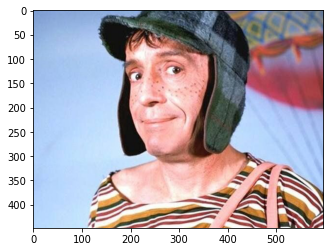

In [ ]:
plt.imshow(content_image);

In [ ]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
content_image.size

(598, 448)

In [ ]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [ ]:
type(content_image)

numpy.ndarray

In [ ]:
content_image.shape

(448, 598, 3)

In [ ]:
content_image.min(),content_image.max()

(0.0, 255.0)

In [ ]:
content_image   = content_image / 255

In [ ]:
content_image.min(),content_image.max()

(0.0, 1.0)

In [ ]:
content_image

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.4627451 , 0.54509807],
        [0.38039216, 0.4627451 , 0.54509807],
        [0.38039216, 0.4627451 , 0.54509807]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.39215687, 0.47058824, 0.5686275 ],
        [0.39215687, 0.47058824, 0.5686275 ],
        [0.39215687, 0.47058824, 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [ ]:
content_image = content_image[tf.newaxis, :]

In [ ]:
content_image.shape

(1, 448, 598, 3)

In [ ]:
style_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Computer Vision Masterclass/Images/tarsila_amaral.jpg')

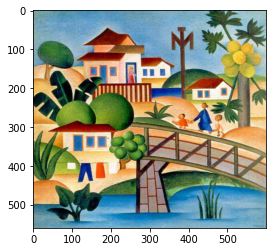

In [ ]:
plt.imshow(style_image);

In [ ]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)

In [ ]:
style_image = style_image / 255

In [ ]:
style_image = style_image[tf.newaxis, :]

In [ ]:
style_image.shape

(1, 560, 600, 3)

In [ ]:
#use the images of similar dims , otherwise the neural network will take a lot of time to train

In [ ]:
#these layers are identified from the model architecture image
content_layers = ['block4_conv2']
style_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [ ]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [ ]:
print(num_content_layers),print(num_style_layers)

1
5


(None, None)

In [ ]:
network.get_layer('block1_conv1').output

<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>

In [ ]:
network.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top = False, weights = 'imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(name).output for name in layer_names]
  network = tf.keras.Model(inputs = [vgg.input] , outputs = outputs)

  return network


In [ ]:
style_extractor = vgg_layers(style_layers)

In [ ]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
style_extractor.output

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
style_output = style_extractor(style_image)

In [ ]:
len(style_output)

5

In [ ]:
style_output[0] #this will be activation values of the first style layer of the network

<tf.Tensor: shape=(1, 560, 600, 64), dtype=float32, numpy=
array([[[[0.0000000e+00, 1.1168056e-01, 6.2121809e-02, ...,
          4.7374946e-01, 4.9520522e-01, 1.5619564e-01],
         [0.0000000e+00, 2.1199909e-01, 3.7911364e-01, ...,
          1.7614037e-01, 1.4901578e+00, 1.1453360e+00],
         [0.0000000e+00, 2.0160642e-01, 3.8564062e-01, ...,
          1.3608325e-01, 1.5308917e+00, 1.1796422e+00],
         ...,
         [0.0000000e+00, 3.3286181e-01, 5.1675826e-01, ...,
          0.0000000e+00, 1.6993666e+00, 1.3342988e+00],
         [0.0000000e+00, 3.4320116e-01, 5.2286661e-01, ...,
          0.0000000e+00, 1.7050551e+00, 1.3393183e+00],
         [7.8187567e-01, 4.2259818e-01, 7.7565944e-01, ...,
          4.4906515e-01, 2.4665630e+00, 2.3771269e+00]],

        [[0.0000000e+00, 1.1404040e-01, 0.0000000e+00, ...,
          7.9952955e-02, 0.0000000e+00, 0.0000000e+00],
         [6.3841367e-01, 2.4004281e-01, 3.5869697e-01, ...,
          0.0000000e+00, 5.8317912e-01, 7.0515585e-01

In [ ]:
style_output[0].shape,style_output[1].shape,style_output[2].shape, style_output[3].shape ,style_output[4].shape

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]),
 TensorShape([1, 35, 37, 512]))

In order to transfer a style from one image to another we need to calculate a  measure called gram matrix which is used to determine the loss between the generated image and the style image

In [ ]:
def gram_matrix(layer_activation):
  result = tf.linalg.einsum('bijc,bijd->bcd',layer_activation,layer_activation)
  input_shape = tf.shape(layer_activation)
  num_locations= tf.cast(input_shape[1]*input_shape[2],tf.float32)

  return result / num_locations

In [ ]:
style_output[0]

<tf.Tensor: shape=(1, 560, 600, 64), dtype=float32, numpy=
array([[[[0.0000000e+00, 1.1168056e-01, 6.2121809e-02, ...,
          4.7374946e-01, 4.9520522e-01, 1.5619564e-01],
         [0.0000000e+00, 2.1199909e-01, 3.7911364e-01, ...,
          1.7614037e-01, 1.4901578e+00, 1.1453360e+00],
         [0.0000000e+00, 2.0160642e-01, 3.8564062e-01, ...,
          1.3608325e-01, 1.5308917e+00, 1.1796422e+00],
         ...,
         [0.0000000e+00, 3.3286181e-01, 5.1675826e-01, ...,
          0.0000000e+00, 1.6993666e+00, 1.3342988e+00],
         [0.0000000e+00, 3.4320116e-01, 5.2286661e-01, ...,
          0.0000000e+00, 1.7050551e+00, 1.3393183e+00],
         [7.8187567e-01, 4.2259818e-01, 7.7565944e-01, ...,
          4.4906515e-01, 2.4665630e+00, 2.3771269e+00]],

        [[0.0000000e+00, 1.1404040e-01, 0.0000000e+00, ...,
          7.9952955e-02, 0.0000000e+00, 0.0000000e+00],
         [6.3841367e-01, 2.4004281e-01, 3.5869697e-01, ...,
          0.0000000e+00, 5.8317912e-01, 7.0515585e-01

In [ ]:
gram_matrix(style_output[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.6311029 , 0.2894989 , 0.28517216, ..., 0.10518257,
         0.36955732, 0.45017174],
        [0.2894989 , 0.24226913, 0.18415499, ..., 0.03151667,
         0.19604628, 0.21700144],
        [0.28517216, 0.18415499, 0.16761069, ..., 0.02775798,
         0.19407696, 0.22697598],
        ...,
        [0.10518257, 0.03151667, 0.02775798, ..., 0.08261996,
         0.06934635, 0.06635   ],
        [0.36955732, 0.19604628, 0.19407696, ..., 0.06934635,
         0.2869287 , 0.3186244 ],
        [0.45017174, 0.21700144, 0.22697598, ..., 0.06635   ,
         0.3186244 , 0.37485752]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self,style_layers,content_layers):
    super().__init__()
    self.vgg=  vgg_layers(style_layers+content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self,inputs):
    inputs = inputs * 255
    preprocessed_image = tf.keras.applications.vgg19.preprocess_input(inputs) #this will convert the images in range -127.50 - 127.50
    outputs = self.vgg(preprocessed_image)
    style_outputs = outputs[:self.num_style_layers]
    content_outputs = outputs[self.num_style_layers:]

    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]
    content_dict = {content_name: value for content_name, value in zip(self.content_layers,content_outputs)}
    style_dict = {style_name: value for style_name, value in zip(self.style_layers,style_outputs)}
    return {'content': content_dict, 'style':style_dict}

In [ ]:
style_layers,content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extractor = StyleContentModel(style_layers,content_layers)

In [ ]:
#the output of this will the result of activation of all the style layers and the content layer
result = extractor(content_image)

In [ ]:
result

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 56, 74, 512), dtype=float32, numpy=
  array([[[[  17.105864,    0.      ,    0.      , ...,  574.59784 ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  291.4189  ,
             132.35054 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  332.05222 ,
             118.952255,    0.      ],
           ...,
           [ 700.125   ,    0.      ,    0.      , ..., 1511.4629  ,
              11.206586,  325.48337 ],
           [ 141.86795 ,    0.      ,    0.      , ..., 1099.7534  ,
              96.57431 ,  195.72565 ],
           [ 137.43658 ,    0.      ,    0.      , ...,  469.20245 ,
             180.22145 ,  676.20026 ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  549.1027  ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,   44.160744,
               0.      ,    0.      ],
           [   0.      ,    0

In [ ]:
for key, value in result.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets = extractor(style_image)['style']

In [ ]:
content_targets = extractor(content_image)['content']

In [ ]:
len(style_targets)

5

In [ ]:
len(content_targets)

1

In [ ]:
new_image = tf.Variable(content_image)

In [ ]:
#this defines the amount of style and content that is needed in the final result (time 9:19 of lecture 196)
content_weight = 1
style_weight = 1000

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate = 0.02)

In [ ]:
expected_output = np.array([10000,15000])
predictions = np.array([8000,15900])


In [ ]:
np.sum(abs(expected_output - predictions))/2


1450.0

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(expected_output,predictions)

1450.0

In [ ]:
mean_squared_error(expected_output,predictions)

2405000.0

In [ ]:
((expected_output - predictions)**2).mean()

2405000.0

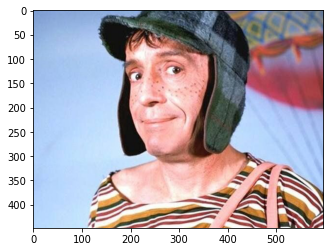

In [ ]:
plt.imshow(tf.squeeze(content_image,axis=0))

Epoch 1 | content loss: 547757.25 | style loss: 545075712.0 | total loss: 109015695360.0
Epoch 2 | content loss: 548165.125 | style loss: 539827264.0 | total loss: 107966005248.0
Epoch 3 | content loss: 548568.5625 | style loss: 534698304.0 | total loss: 106940211200.0
Epoch 4 | content loss: 549028.375 | style loss: 529686400.0 | total loss: 105937829888.0
Epoch 5 | content loss: 549496.0 | style loss: 524778752.0 | total loss: 104956305408.0
Epoch 6 | content loss: 549899.75 | style loss: 519967488.0 | total loss: 103994040320.0
Epoch 7 | content loss: 550279.25 | style loss: 515261824.0 | total loss: 103052910592.0
Epoch 8 | content loss: 550717.3125 | style loss: 510647168.0 | total loss: 102129983488.0
Epoch 9 | content loss: 551186.75 | style loss: 506132736.0 | total loss: 101227094016.0
Epoch 10 | content loss: 551597.25 | style loss: 501705408.0 | total loss: 100341628928.0
Epoch 11 | content loss: 551959.25 | style loss: 497361536.0 | total loss: 99472859136.0
Epoch 12 | cont

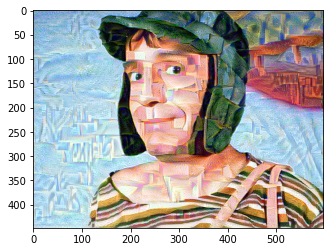

In [ ]:
#In normal neural network during training we update the weight, here we update the pixels to form new image
epochs = 100
print_every =1
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)
    content_outputs = outputs['content']
    style_outputs = outputs['style']
    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) **2 )for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) **2 )for name in style_outputs.keys()])
    total_loss = content_loss*content_weight / num_content_layers + style_loss * style_weight /num_style_layers
  #tape tells the direction of change in pixels, increase or decrease
  gradient = tape.gradient(total_loss,new_image)
  optimizer.apply_gradients([(gradient,new_image)])

  new_image.assign(tf.clip_by_value(new_image,0.0,1.0))

  if (epochs + 1)% print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss: {}'.format(epoch+1,content_loss,style_loss,total_loss))
    plt.imshow(tf.squeeze(new_image,axis = 0))


(-0.5, 599.5, 559.5, -0.5)

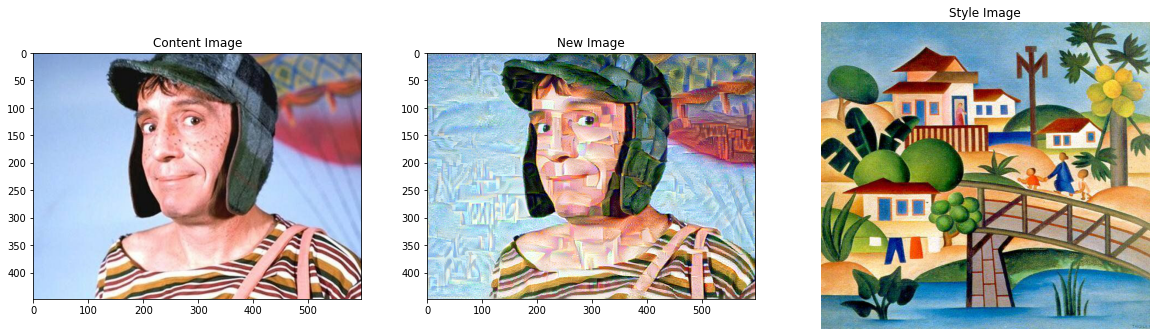

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,8))
ax1.imshow(tf.squeeze(content_image, axis =0))
ax1.set_title("Content Image")
ax2.imshow(tf.squeeze(new_image, axis =0))
ax2.set_title("New Image")
ax3.imshow(tf.squeeze(style_image, axis =0))
ax3.set_title("Style Image")
plt.axis('off')